In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# Load the dataset using pandas
df = pd.read_csv('C:\\Users\\This PC\\Desktop\\training\\trainingtask1\\Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Change the column name
df.rename(columns={'Genre': 'Gender','Annual Income (k$)':'Annual Income'}, inplace=True)
df

,CustomerID,Gender,Age,Annual Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
# checking for null values in each column
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income             0
Spending Score (1-100)    0
dtype: int64

In [6]:
# To calculate the probability that a randomly selected customer
# falls into a specific age group 
# (e.g., under 30, between 30 and 40, over 40)

# Total number of customers (sample size)
total_customers = len(df)
print(total_customers)

200


In [7]:
# Count of customers under 30
under_30_count = len(df[df['Age'] < 30])
print(under_30_count)

55


In [8]:
# Probability of selecting a customer under 30
probability_under_30 = under_30_count / total_customers
print(probability_under_30)

0.275


In [9]:
# Filter the DataFrame to select customers under the age of 30
under_30_customers = df[df['Age'] < 30]

# Count the number of male and female customers in the under 30 group
male_count = len(under_30_customers[under_30_customers['Gender'] == 'Male'])
female_count = len(under_30_customers[under_30_customers['Gender'] == 'Female'])

print("male counts",male_count)
print("female counts",female_count)

male counts 26
female counts 29


In [10]:
# If there are male customers in the dataset
if male_count > 0:
    # Find the minimum and maximum age values for male customers
    min_male_age = df[df['Gender'] == 'Male']['Age'].min()
    max_male_age = df[df['Gender'] == 'Male']['Age'].max()

    print("Range of male ages:", min_male_age, "to", max_male_age)
else:
    print("There are no male customers in the dataset.")

Range of male ages: 18 to 70


In [11]:
# Calculate the probability of selecting a male customer
probability_male = male_count / total_customers
print(probability_male)
# Calculate the probability of selecting a female customer
probability_female = female_count / total_customers
print(probability_female)

0.13
0.145


In [12]:
# compliment example for this dataset
# Calculating the complement probability of not selecting a male customer
probability_not_male = 1 - probability_male
print(probability_not_male)

0.87


In [13]:
probability_not_female = 1 - probability_female
print(probability_not_female)

0.855


In [14]:
print(probability_male + probability_not_male)

1.0


In [15]:
# Calculate the intersection probability
probability_male_and_under_30 = probability_male * probability_under_30
print(probability_male_and_under_30)
print(probability_male_and_under_30*100)

0.035750000000000004
3.575


In [16]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

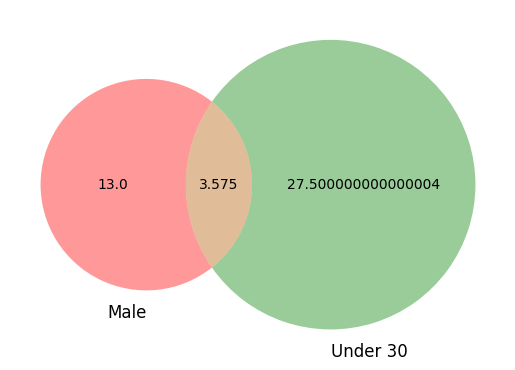

In [17]:
# Create a Venn diagram with labels
venn2(subsets=(probability_male*100, probability_under_30*100, probability_male_and_under_30*100),
      set_labels=('Male', 'Under 30'))

# Display the plot
plt.show()

In [18]:
import seaborn as sns

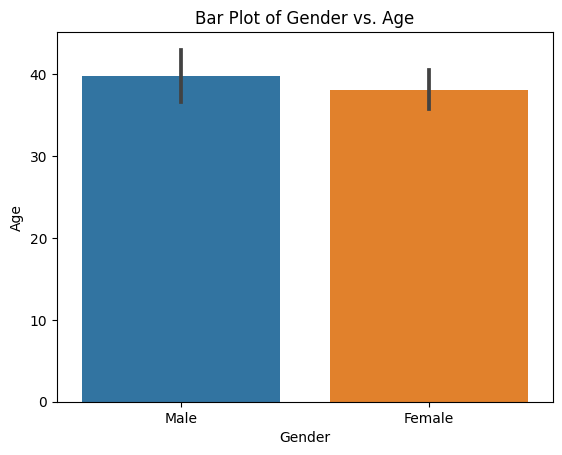

In [19]:
# Create a bar plot
sns.barplot(x='Gender', y='Age', data=df)

# Add labels and a title
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Bar Plot of Gender vs. Age')

# Show the plot
plt.show()

In [20]:
# Calculate the median (50th percentile) of the 'Age' column
median_age = df['Age'].median()
print(median_age)

36.0


In [21]:
# Calculate quartiles for the 'Age' column
quartiles = df['Age'].quantile([0.25, 0.5, 0.75])

# Print the quartiles
print("1st Quartile (25th percentile):", quartiles[0.25])
print("2nd Quartile (Median, 50th percentile):", quartiles[0.5])
print("3rd Quartile (75th percentile):", quartiles[0.75])

1st Quartile (25th percentile): 28.75
2nd Quartile (Median, 50th percentile): 36.0
3rd Quartile (75th percentile): 49.0


In [22]:
# Separate data for male and female customers
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

# Calculate quartiles for the 'Age' column for male customers
male_quartiles = male_data['Age'].quantile([0.25, 0.75])

# Calculate quartiles for the 'Age' column for female customers
female_quartiles = female_data['Age'].quantile([0.25, 0.75])

# Print the quartiles for male and female customers
print("Male Customers - 25th Percentile:", male_quartiles[0.25])
print("Male Customers - 75th Percentile:", male_quartiles[0.75])

print("Female Customers - 25th Percentile:", female_quartiles[0.25])
print("Female Customers - 75th Percentile:", female_quartiles[0.75])

Male Customers - 25th Percentile: 27.75
Male Customers - 75th Percentile: 50.5
Female Customers - 25th Percentile: 29.0
Female Customers - 75th Percentile: 47.5


In [23]:
data_to_analyze = df['Age']

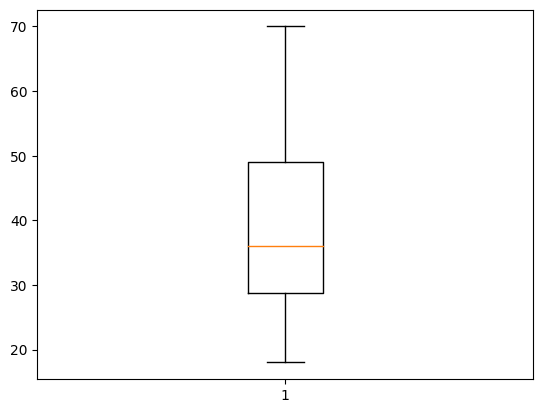

In [24]:
# Create a box plot
plt.boxplot(data_to_analyze)
plt.show()

In [25]:
# Calculate IQR for male customers' ages
male_iqr=male_quartiles[0.75]-male_quartiles[0.25]

# Calculate IQR for female customers' ages
female_iqr=female_quartiles[0.75]-female_quartiles[0.25]

print("Male Customers:")
print("Q1:", male_quartiles[0.25])
print("Q3:", male_quartiles[0.75])
print("IQR:", male_iqr)

print("\nFemale Customers:")
print("Q1:", female_quartiles[0.25])
print("Q3:", female_quartiles[0.75])
print("IQR:", female_iqr)

Male Customers:
Q1: 27.75
Q3: 50.5
IQR: 22.75

Female Customers:
Q1: 29.0
Q3: 47.5
IQR: 18.5


In [26]:
data_analyze = male_data['Age']

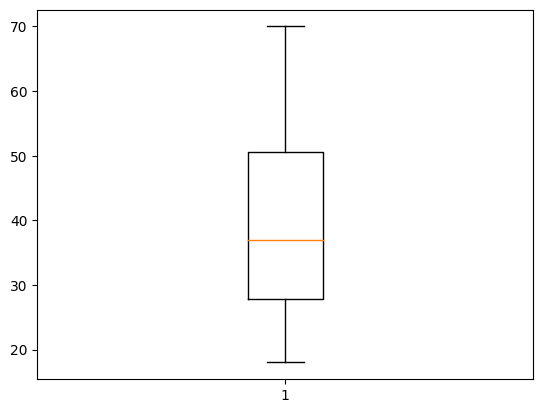

In [27]:
# Create a box plot
plt.boxplot(data_analyze)
plt.show()

In [28]:
# Determine lower and upper bounds for male customers' ages
male_lower_bound = male_quartiles[0.25] - 1.5 * male_iqr
male_upper_bound = male_quartiles[0.75] + 1.5 * male_iqr

# Determine lower and upper bounds for female customers' ages
female_lower_bound = female_quartiles[0.25] - 1.5 * female_iqr
female_upper_bound = female_quartiles[0.75] + 1.5 * female_iqr

print("Male Customers:")
print("Lower Bound:", male_lower_bound)
print("Upper Bound:", male_upper_bound)

print("\nFemale Customers:")
print("Lower Bound:", female_lower_bound)
print("Upper Bound:", female_upper_bound)

Male Customers:
Lower Bound: -6.375
Upper Bound: 84.625

Female Customers:
Lower Bound: 1.25
Upper Bound: 75.25


In [29]:
# male_age=male_quartiles[0.25]
# # Identify outliers for male customers' ages
# male_outliers = male_age[(male_quartiles[0.25] < male_lower_bound) | (male_quartiles[0.25] > male_upper_bound)]

# # Identify outliers for female customers' ages
# female_outliers = female_age[(female_age < female_lower_bound) | (female_age > female_upper_bound)]

# print("Outliers for Male Customers:")
# print(male_outliers)

# print("\nOutliers for Female Customers:")
# print(female_outliers)

In [30]:
# conditional probability
# Weather Forecast: In weather forecasting, P(Rain | Cloudy) represents the probability of rain occurring given that the sky is cloudy. The likelihood of rain is higher when the sky is cloudy compared to when it's clear.

# Card Games: In card games like poker, P(Full House | Three of a Kind) represents the probability of getting a full house (a specific hand) in the game given that you already have three of a kind.

In [36]:
# Calculate marginal probabilities
# total_customers = len(df) alreday calculated above

# Probability of being Male (Event A)
p_male = len(df[df['Gender'] == 'Male']) / total_customers
print(p_male)
# Probability of being Female (Event B)
p_female = len(df[df['Gender'] == 'Female']) / total_customers
print(p_female)
# Probability of age under 30 (Event C)
p_age_under_30 = len(df[df['Age'] < 30]) / total_customers
print(p_age_under_30)
# Probability of age between 30 and 40 (Event D)
p_age_between_30_and_40 = len(df[(df['Age'] >= 30) & (df['Age'] < 40)]) / total_customers
print(p_age_between_30_and_40)
# Probability of age over 40 (Event E)
p_age_over_40 = len(df[df['Age'] >= 40]) / total_customers
print(p_age_over_40)

0.44
0.56
0.275
0.305
0.42


In [37]:
# Calculate Joint Probabilities

# Probability of being Male and Age < 30 (P(A and C))
p_male_and_age_under_30 = len(df[(df['Gender'] == 'Male') & (df['Age'] < 30)]) / total_customers
print(p_male_and_age_under_30)
# Probability of being Female and Age >= 40 (P(B and E))
p_female_and_age_over_40 = len(df[(df['Gender'] == 'Female') & (df['Age'] >= 40)]) / total_customers
print(p_female_and_age_over_40)

0.13
0.23


In [38]:
# Calculate Conditional Probabilities

# Conditional probability of being Male given Age < 30 (P(A | C))
p_male_given_age_under_30 = p_male_and_age_under_30 / p_age_under_30
print(p_male_given_age_under_30)
# Conditional probability of being Female given Age >= 40 (P(B | E))
p_female_given_age_over_40 = p_female_and_age_over_40 / p_age_over_40
print(p_female_given_age_over_40)

0.4727272727272727
0.5476190476190477


In [45]:
#independent events
# prob of being male
print("p_male :",p_male)
# Probability of having annual income > 50
probability_income_gt_50 = len(df[df['Annual Income'] > 50]) / total_customers
print("probability_income_gt_50 :",probability_income_gt_50)
# Probability of being both male and having annual income > 50 (independent events)
probability_both = p_male * probability_income_gt_50

print("Probability (Male and Income > 50):",p_male,"*",probability_income_gt_50, ":", probability_both)

p_male : 0.44
probability_income_gt_50 : 0.63
Probability (Male and Income > 50): 0.44 * 0.63 : 0.2772


In [48]:
# Check if Male and Female are mutually exclusive
probability_both = len(df[(df['Gender'] == 'Male') & (df['Gender'] == 'Female')]) / total_customers

print("Probability (Male):", p_male)
print("Probability (Female):", p_female)
print("Probability (Mutually Exclusive):", probability_both)

Probability (Male): 0.44
Probability (Female): 0.56
Probability (Mutually Exclusive): 0.0


In [49]:
#Bayes theorem

# Calculate P(A), the prior probability of being male

male_customers = len(df[df['Gender'] == 'Male'])
p_A = male_customers / total_customers

# Calculate P(B|A), the conditional probability of high spending score given male

male_high_spend = len(df[(df['Gender'] == 'Male') & (df['Spending Score (1-100)'] > 75)])  # Assuming high score is > 75
p_B_given_A = male_high_spend / male_customers

# Calculate P(B), the overall probability of high spending score
high_spend_customers = len(df[df['Spending Score (1-100)'] > 75])  # Assuming high score is > 75
p_B = high_spend_customers / total_customers

# Calculate P(A|B), the probability of being male given high spending score
p_A_given_B = (p_B_given_A * p_A) / p_B

print("Probability of being male given high spending score:", p_A_given_B)

Probability of being male given high spending score: 0.39473684210526316


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income           200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [33]:
df.describe()

,CustomerID,Age,Annual Income,Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000
